<a href="https://colab.research.google.com/github/arfandiTelU/Skripsi/blob/master/Cnn_Klasifikasi_Bibit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Menghubungkan Dengan Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Install Library

In [0]:
!pip install -q keras
!pip install opencv-contrib-python

Import Library

In [0]:
import numpy as np
import pandas as pd
import tensorflow_hub as hub
from matplotlib import pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

Mengambil, Memproses, Dan Membagi Data

In [3]:
train_dir = '/content/gdrive/My Drive/Dataset/Train'
test_dir = '/content/gdrive/My Drive/Dataset/Test'

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=.12)
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=.12)
test_datagen = ImageDataGenerator(rescale=1./255)

IMAGE_SHAPE = (224,224)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    subset = "training",
    shuffle = True,
    target_size = IMAGE_SHAPE,
    batch_size = 20
)

valid_generator = valid_datagen.flow_from_directory(
    train_dir,
    subset = "validation",
    shuffle = True,
    target_size = IMAGE_SHAPE,
    batch_size = 20
)

Found 510 images belonging to 5 classes.
Found 65 images belonging to 5 classes.


In [6]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Cabai' 'Pakcoy' 'Sawi' 'Terong' 'Tomat']


Membangun Arsitektur Model

In [26]:
# print(train_generator.num_classes)
# model = models.Sequential()

# model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3)))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Flatten())

# model.add(layers.Dense(256, activation = 'relu'))

# model.add(layers.Dropout(0.4))

# model.add(layers.Dense(5, activation = 'softmax'))

model = models.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  layers.Dropout(0.4),
  layers.Dense(5, activation='softmax')
])
model.build([None, 224, 224, 3])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout_8 (Dropout)          multiple                  0         
_________________________________________________________________
dense_14 (Dense)             multiple                  6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
model.compile(
  # optimizer=optimizers.RMSprop(lr=1e-4),
  optimizer=optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch = 26, 
    epochs = 20,
    validation_data=valid_generator,
    validation_steps = 4)

# history = model.fit(
#     train_generator, 
#     epochs = 20,
#     steps_per_epoch = 26,
#     validation_data=valid_generator,
#     validation_steps = 4)

Epoch 1/20
26/26 [==============================] - 17s 657ms/step - loss: 1.7148 - acc: 0.3176 - val_loss: 1.2235 - val_acc: 0.4615
Epoch 2/20
26/26 [==============================] - 16s 629ms/step - loss: 1.2144 - acc: 0.5098 - val_loss: 0.7334 - val_acc: 0.8000
Epoch 3/20
26/26 [==============================] - 16s 618ms/step - loss: 0.8334 - acc: 0.6647 - val_loss: 0.7233 - val_acc: 0.6923
Epoch 4/20
26/26 [==============================] - 16s 631ms/step - loss: 0.7696 - acc: 0.7098 - val_loss: 0.6649 - val_acc: 0.7538
Epoch 5/20
26/26 [==============================] - 16s 632ms/step - loss: 0.6172 - acc: 0.7706 - val_loss: 0.5619 - val_acc: 0.8000
Epoch 6/20
26/26 [==============================] - 16s 634ms/step - loss: 0.5520 - acc: 0.7765 - val_loss: 0.6502 - val_acc: 0.7231
Epoch 7/20
26/26 [==============================] - 16s 623ms/step - loss: 0.5345 - acc: 0.7804 - val_loss: 0.5247 - val_acc: 0.7846
Epoch 8/20
26/26 [==============================] - 16s 624ms/step - 

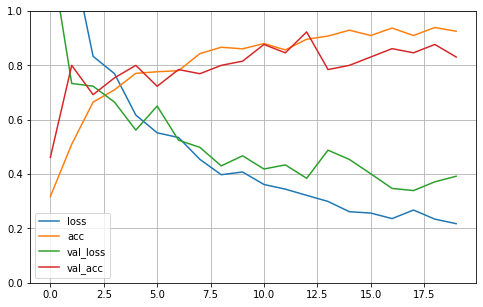

In [29]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [54]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = IMAGE_SHAPE,
    batch_size = 65
)

evaluate = model.evaluate(test_generator, steps = 1)

Found 65 images belonging to 5 classes.
1/1 [==============================] - 0s 7ms/step - loss: 0.5464 - acc: 0.8154


In [55]:
test_image_batch, test_label_batch = next(iter(test_generator))
true_label_ids = np.argmax(test_label_batch, axis=-1)
predict = model.predict(test_image_batch)
pred_dataframe = pd.DataFrame(predict)
pred_dataframe.columns = dataset_labels

print("Prediction results for the first elements")
pred_dataframe

Prediction results for the first elements


,Cabai,Pakcoy,Sawi,Terong,Tomat
0,0.002522,0.000624,0.000981,0.592615,0.403258
1,0.009209,0.000345,0.000006,0.000172,0.990267
2,0.009453,0.116342,0.089882,0.695148,0.089175
3,0.000803,0.997689,0.000885,0.000005,0.000618
4,0.002692,0.000050,0.000008,0.000295,0.996954
...,...,...,...,...,...
60,0.007535,0.567371,0.365392,0.059398,0.000304
61,0.002678,0.000467,0.000076,0.996311,0.000468
62,0.006664,0.958430,0.023766,0.000825,0.010315
63,0.000908,0.010950,0.969743,0.017101,0.001298


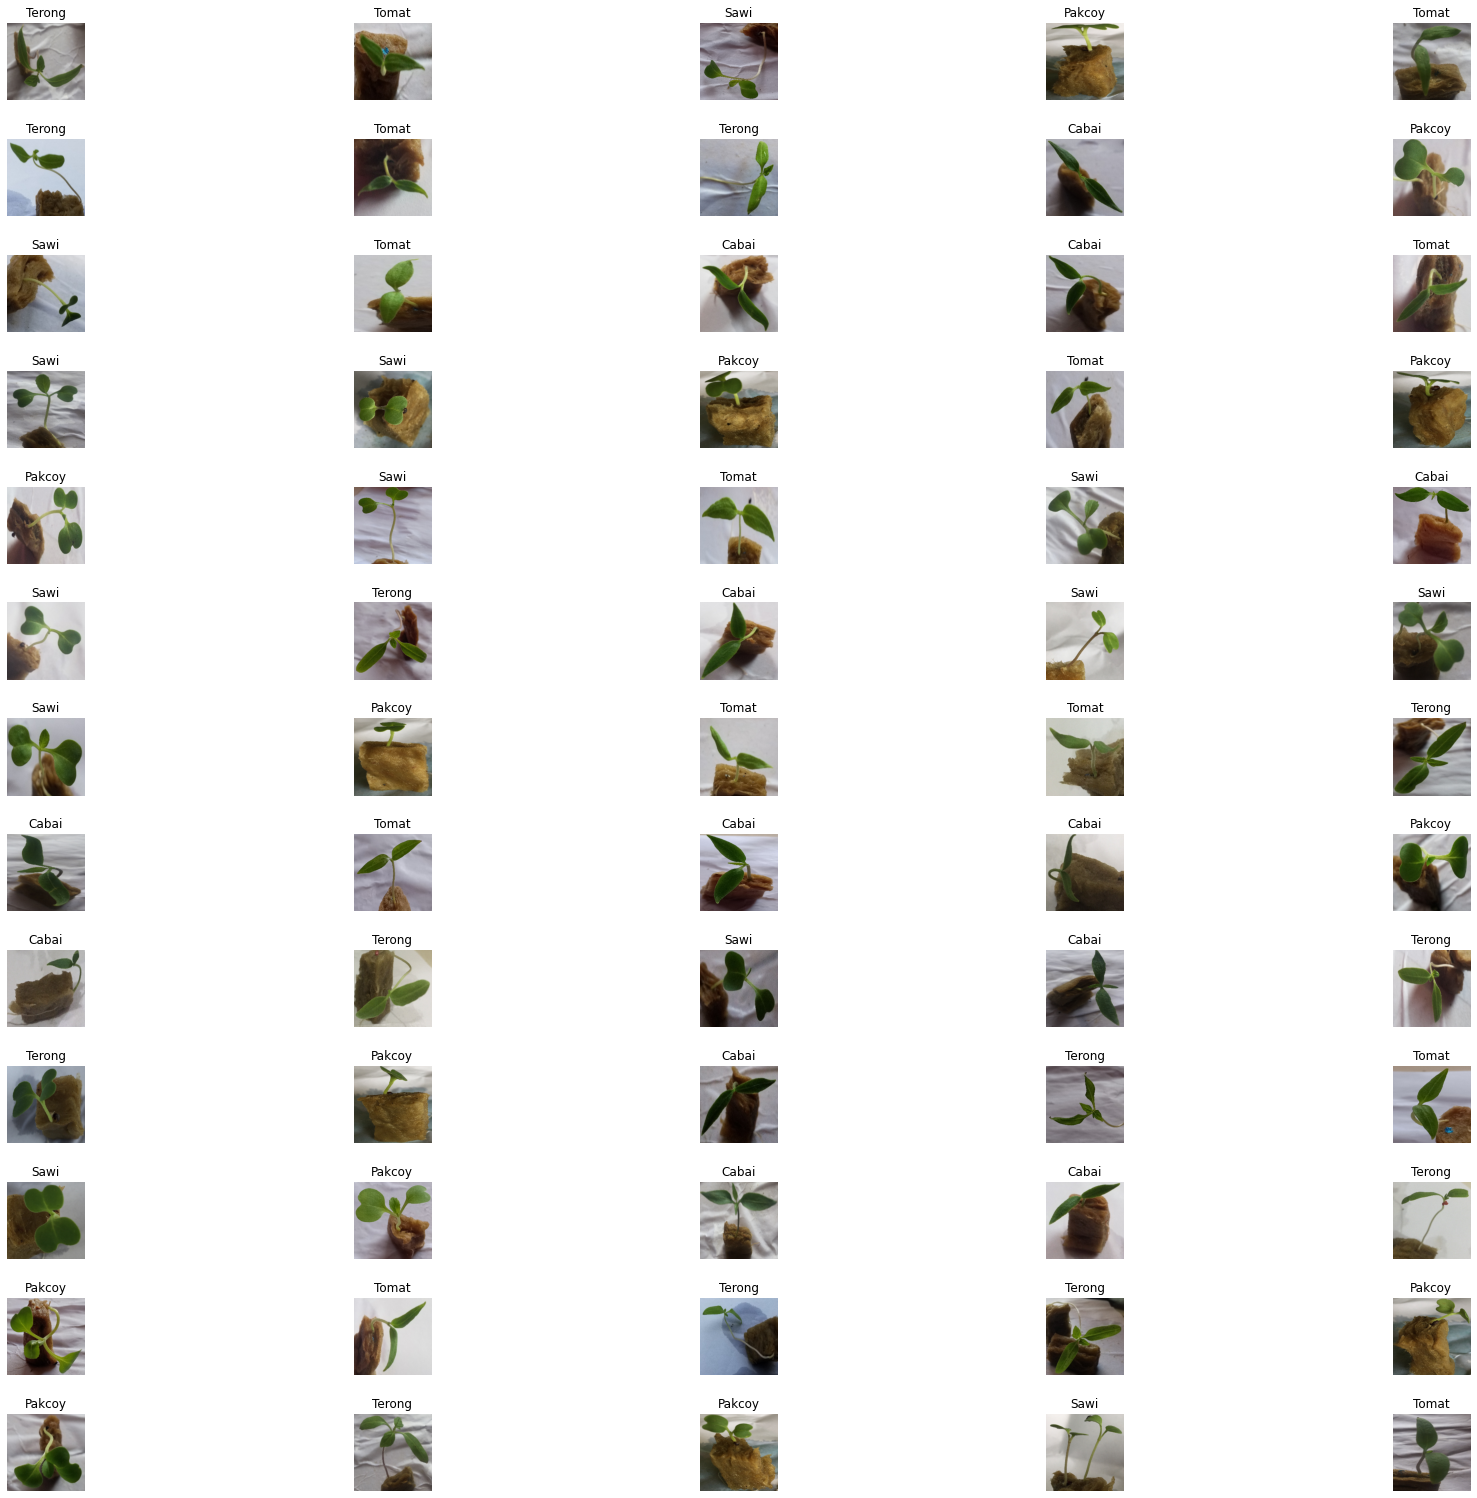

In [67]:
true_labels = dataset_labels[true_label_ids]
plt.figure(figsize=(30,27))
plt.subplots_adjust(hspace=0.5)
for n in range(true_label_ids.size):
  plt.subplot(13,5,n+1)
  plt.imshow(test_image_batch[n])
  plt.title(true_labels[n].title())
  plt.axis('off')
# _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

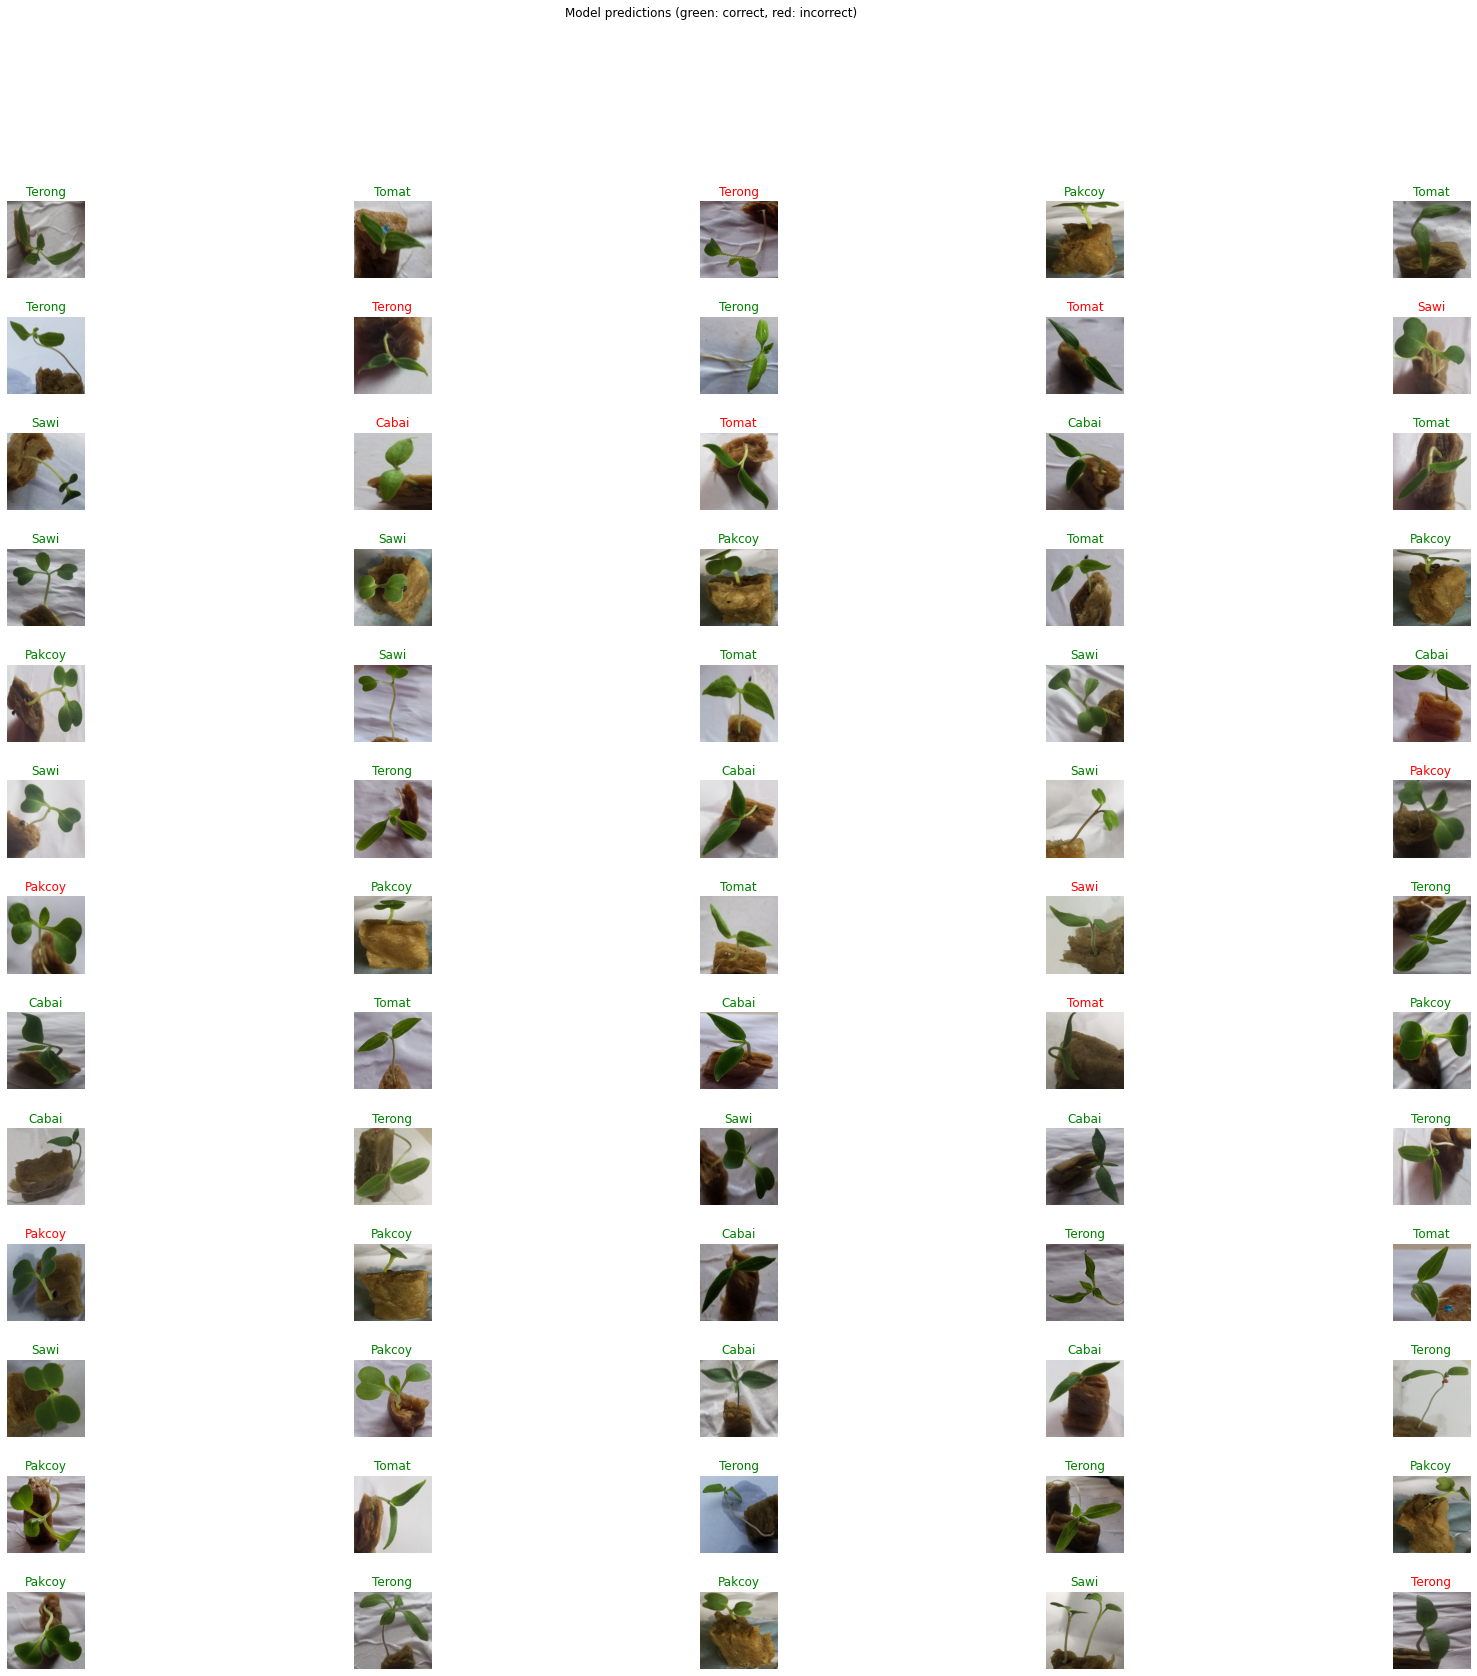

In [68]:
predicted_ids = np.argmax(predict, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(30,27))
plt.subplots_adjust(hspace=0.5)
for n in range(true_label_ids.size):
  plt.subplot(13,5,n+1)
  plt.imshow(test_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")